# Explore here

In [24]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

In [26]:
df_raw.to_csv("../data/raw/airbnb_raw_data")

In [27]:
df_raw.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
41827,32521604,Peaceful and private room in heart of Ft Greene,118566355,Luis & Tiana,Brooklyn,Fort Greene,40.68875,-73.97610,Private room,90,2,1,2019-07-02,1.00,1,83
25155,20152264,"Spacious, cozy, fully equipped apartment with AC",10461088,Noam,Brooklyn,Carroll Gardens,40.68310,-73.99945,Entire home/apt,180,4,0,NaN,NaN,1,0
36170,28755241,New York Apt -Subway 5 min & Supermarket 1 min,37708037,Daniela,Manhattan,Financial District,40.70815,-74.00438,Entire home/apt,199,3,5,2019-06-08,0.66,1,37
5384,3890417,Sunrise & Sunset in Penthouse - 20min to Manha...,18260299,Ota,Brooklyn,Bushwick,40.69439,-73.90715,Private room,45,30,7,2019-01-02,0.74,6,92
17970,14080022,Beautiful 2B/2B at Central Park and the AMNH,84632856,Brooke,Manhattan,Upper West Side,40.77743,-73.97616,Entire home/apt,325,3,4,2016-10-09,0.11,1,0
34563,27405874,Neat and quiet space for you.,206538133,Gayle,Manhattan,Financial District,40.70522,-74.00728,Entire home/apt,175,2,1,2018-08-26,0.09,1,0
19710,15784377,"Sixth Ave Chelsea, 1bd Serviced Apartment*",22541573,Ken,Manhattan,Chelsea,40.74584,-73.99103,Entire home/apt,229,30,3,2019-03-08,0.12,87,364
14046,10725897,"Sunny, Arty East Williamsburg Loft",55433649,Brian,Brooklyn,Williamsburg,40.71504,-73.93613,Private room,45,1,169,2019-07-04,4.11,1,134
4043,2560559,Sunny Private Room Near Prospect Pk,2766490,Daisy,Brooklyn,Crown Heights,40.68027,-73.96379,Private room,50,7,1,2016-01-03,0.02,1,0
18782,14870802,Private Room in the Heart of SoHo,34252002,Harriet,Manhattan,Nolita,40.72204,-73.99705,Private room,100,2,10,2017-03-19,0.29,1,0


In [28]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [29]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [30]:
df_raw.drop("host_id", axis = 1).duplicated().sum()

0

In [31]:
df_processed = df_raw.copy()

In [32]:
df_processed = df_processed.drop(["id","host_id","calculated_host_listings_count","neighbourhood", "name","latitude","minimum_nights","longitude","host_name","last_review", "reviews_per_month" ], axis=1)

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

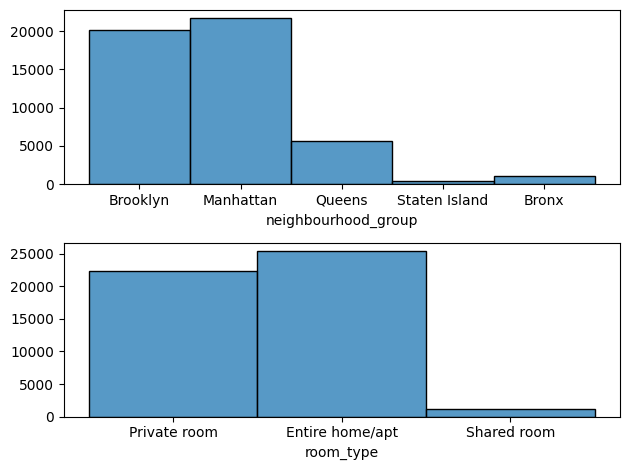

In [33]:
# Create a multiple histogram
fig, axis = plt.subplots(2,1)
sns.histplot(ax = axis[0], data = df_processed, x = "neighbourhood_group").set(ylabel = None)
sns.histplot(ax = axis[1], data = df_processed, x = "room_type").set(ylabel = None)
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

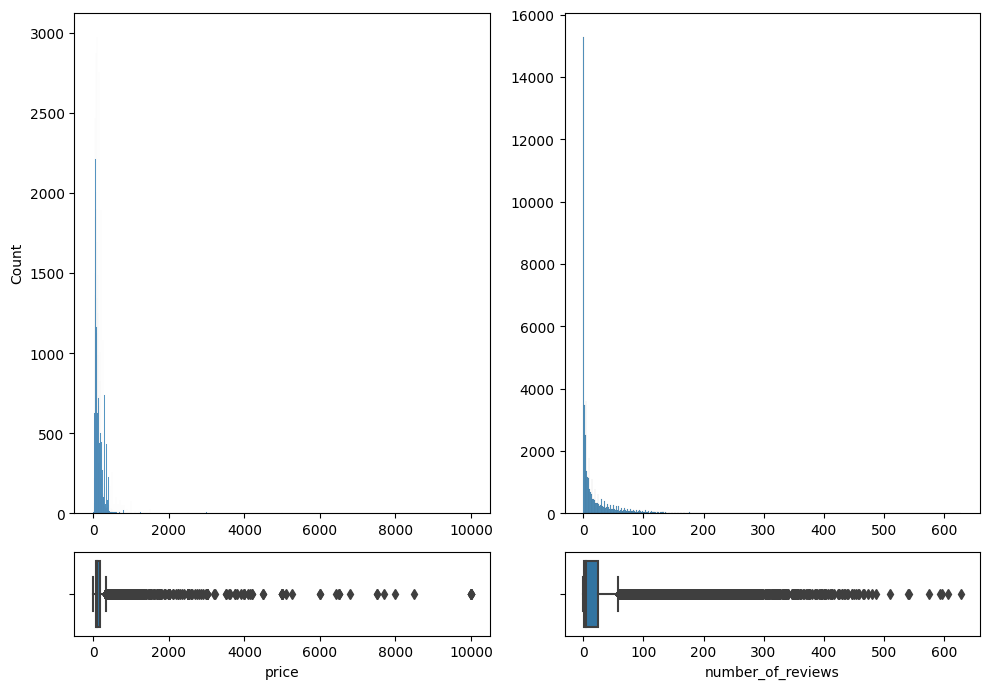

In [34]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df_processed, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_processed, x = "price")
sns.histplot(ax = axis[0, 1], data = df_processed, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_processed, x = "number_of_reviews")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


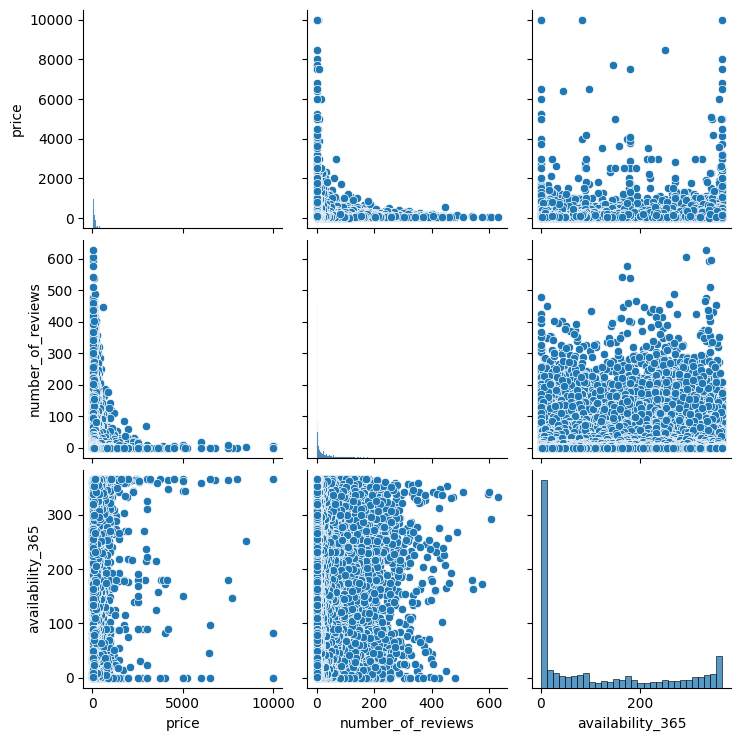

In [35]:
the_ppplot = sns.pairplot(data=df_processed)
plt.show()

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


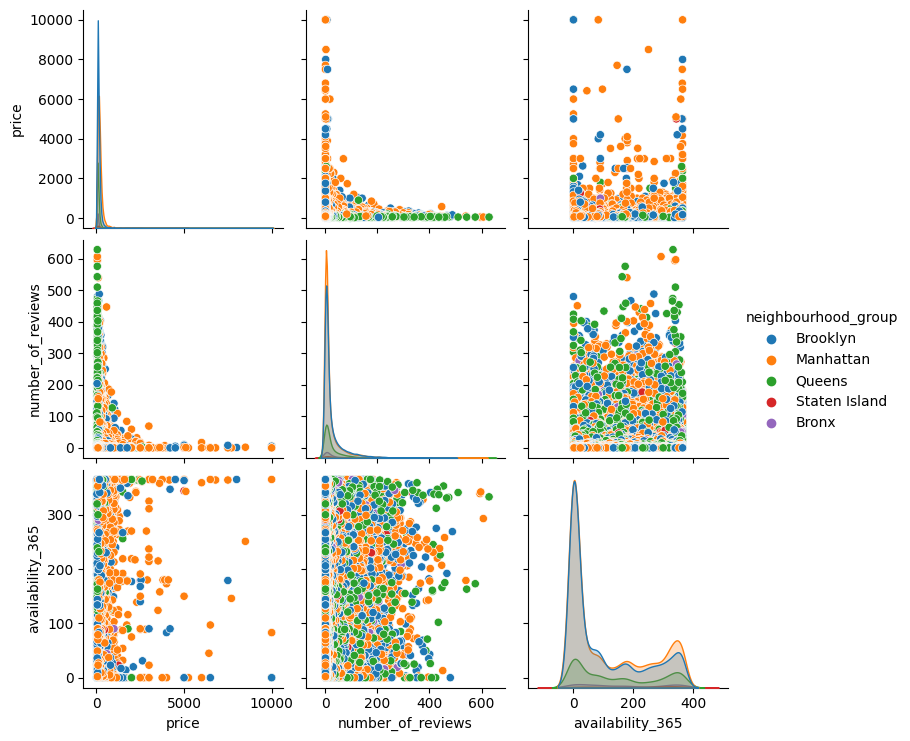

In [36]:
the_ppplot = sns.pairplot(data=df_processed, hue='neighbourhood_group')
plt.show()

In [37]:
df_processed.sample(10)

,neighbourhood_group,room_type,price,number_of_reviews,availability_365
150,Manhattan,Private room,156,79,307
295,Brooklyn,Entire home/apt,145,127,72
5788,Manhattan,Entire home/apt,110,26,14
40337,Brooklyn,Entire home/apt,140,7,281
28818,Manhattan,Entire home/apt,237,7,0
29698,Queens,Private room,98,26,215
44184,Brooklyn,Entire home/apt,250,0,12
48220,Manhattan,Entire home/apt,150,0,40
14314,Brooklyn,Entire home/apt,78,1,0
9044,Bronx,Entire home/apt,100,57,284


In [38]:
num_values = df_processed.copy()
num_values['neighbourhood_group'].replace(['Brooklyn', 'Manhattan','Queens', 'Staten Island', 'Bronx'],[0,1,2,3,4], inplace=True)
num_values['room_type'].replace(['Shared room','Private room', 'Entire home/apt'],[0,1,2], inplace=True)


In [39]:
num_values

,neighbourhood_group,room_type,price,number_of_reviews,availability_365
0,0,1,149,9,365
1,1,2,225,45,355
2,1,1,150,0,365
3,0,2,89,270,194
4,1,2,80,9,0
...,...,...,...,...,...
48890,0,1,70,0,9
48891,0,1,40,0,36
48892,1,2,115,0,27
48893,1,0,55,0,2


In [49]:
num_values.describe().T

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,48895.0,0.786911,0.844386,0.0,0.0,1.0,1.0,4.0
room_type,48895.0,1.495940,0.545379,0.0,1.0,2.0,2.0,2.0
price,48895.0,152.720687,240.154170,0.0,69.0,106.0,175.0,10000.0
number_of_reviews,48895.0,23.274466,44.550582,0.0,1.0,5.0,24.0,629.0
availability_365,48895.0,112.781327,131.622289,0.0,0.0,45.0,227.0,365.0


In [40]:
num_values.corr()

,neighbourhood_group,room_type,price,number_of_reviews,availability_365
neighbourhood_group,1.000000,-0.035077,0.002672,0.011454,0.123287
room_type,-0.035077,1.000000,0.249350,-0.002724,-0.022500
price,0.002672,0.249350,1.000000,-0.047954,0.081829
number_of_reviews,0.011454,-0.002724,-0.047954,1.000000,0.172028
availability_365,0.123287,-0.022500,0.081829,0.172028,1.000000


/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


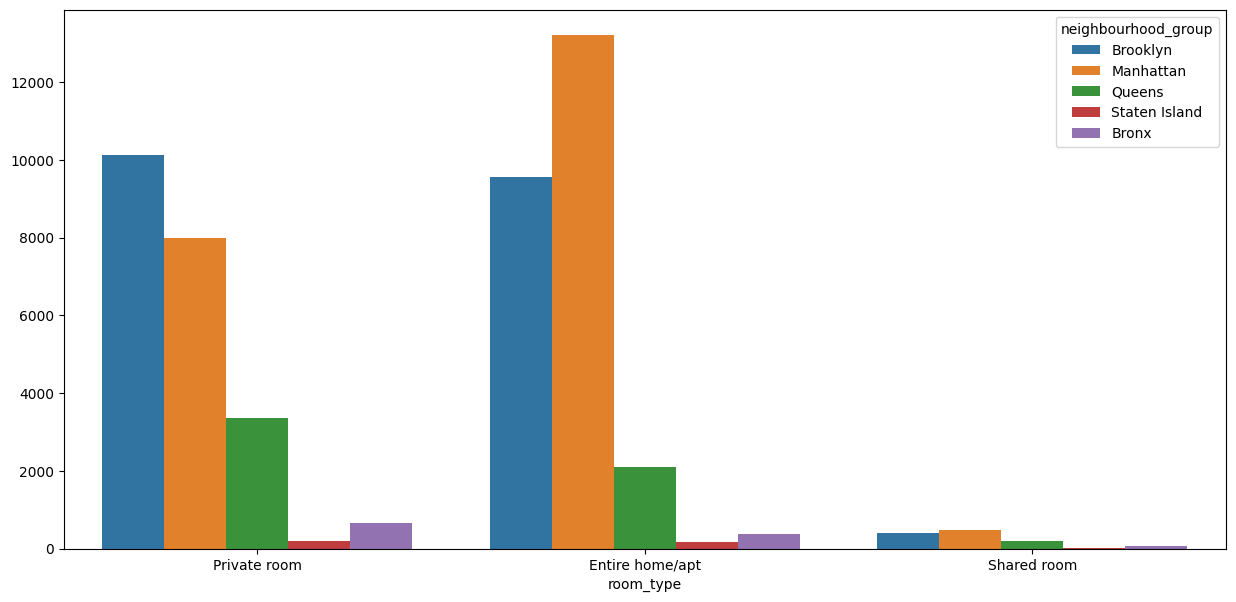

In [41]:
fig, axis = plt.subplots(1,1, figsize = (15, 7))
sns.countplot(data = df_processed, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)

plt.show()

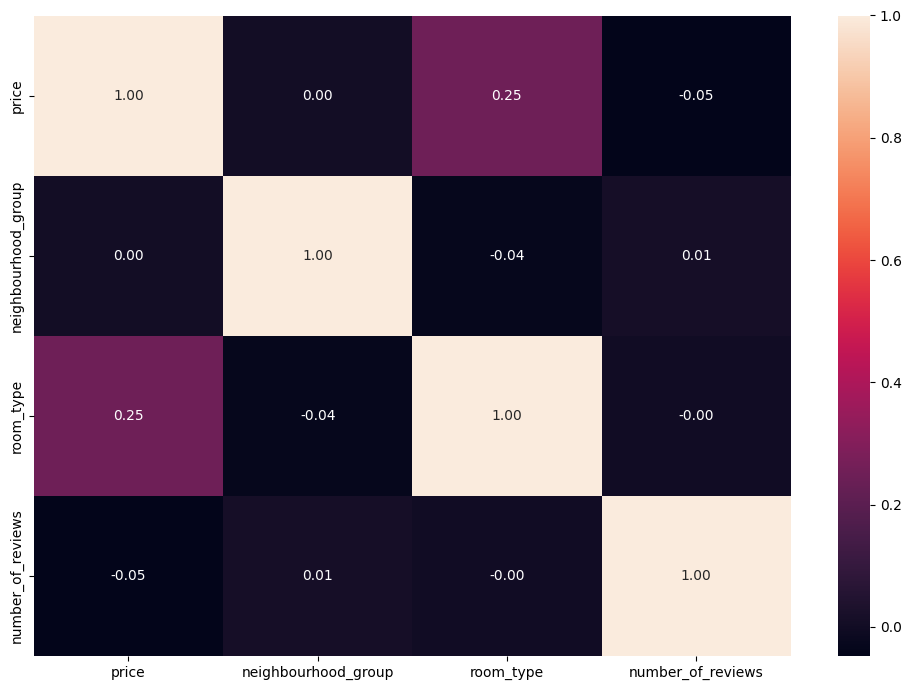

In [42]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(num_values[["price", "neighbourhood_group", "room_type", "number_of_reviews"]].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()


/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


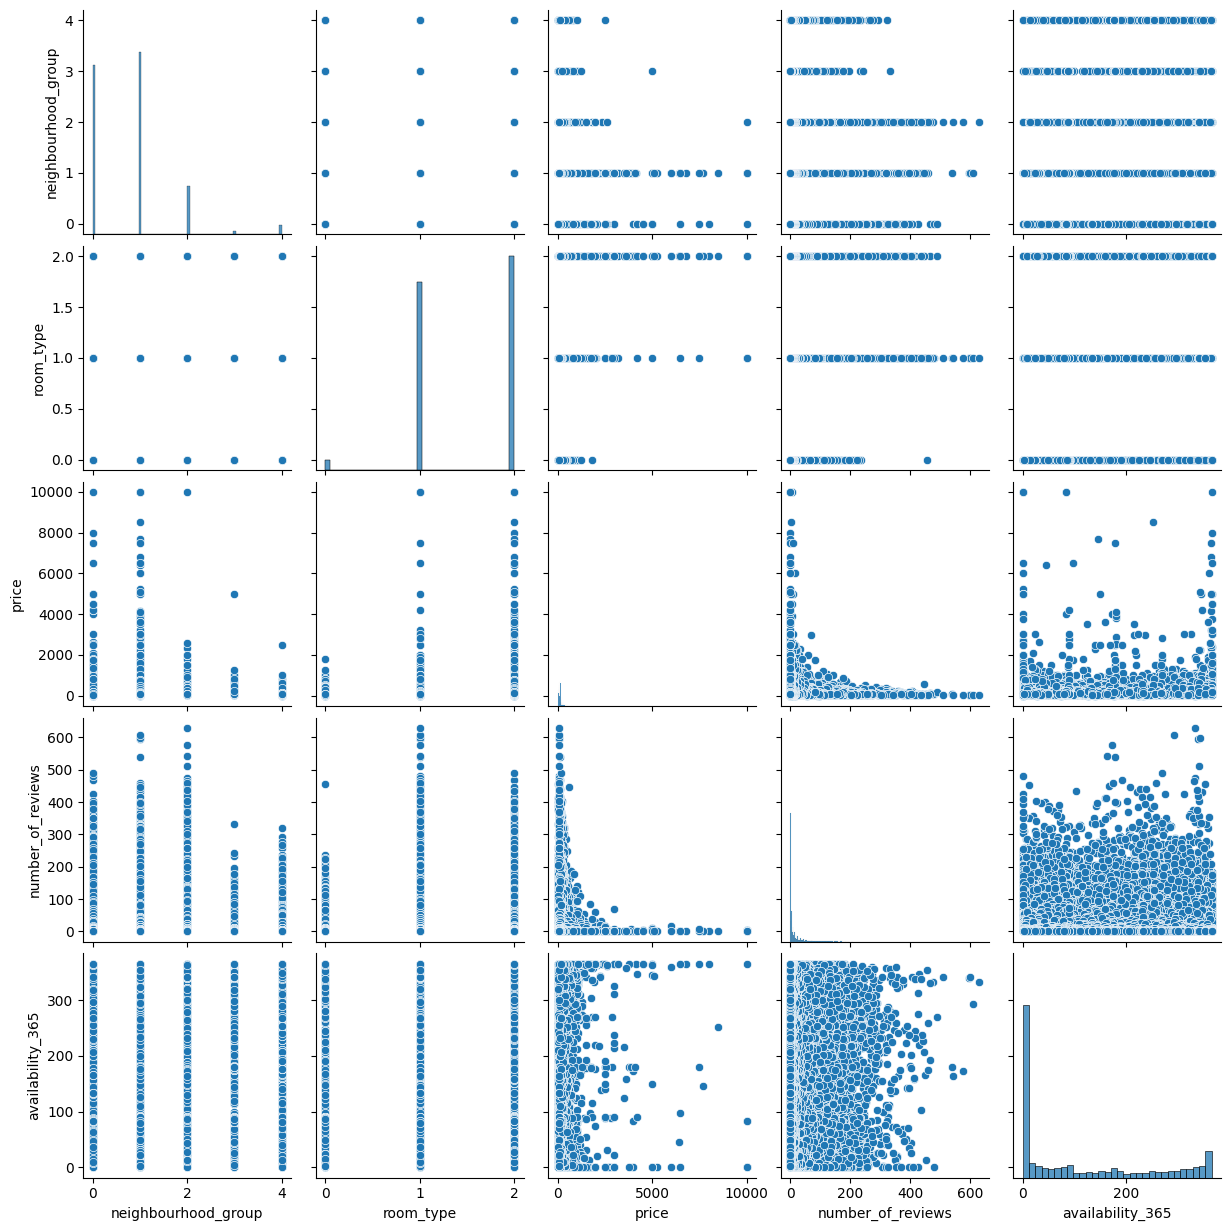

In [43]:
the_ppplot = sns.pairplot(data=num_values)
plt.show()

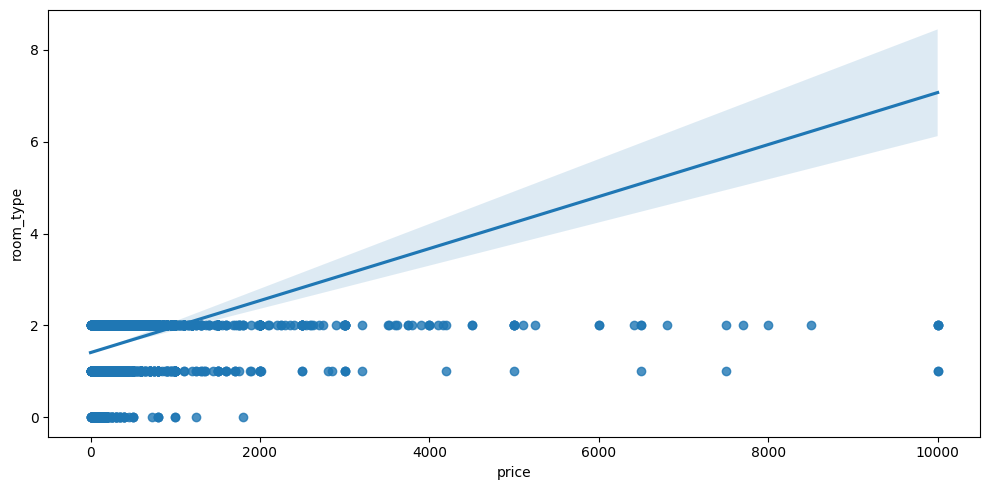

In [48]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)
sns.regplot(data = num_values, x = "price", y = "room_type")

plt.tight_layout()

plt.show()


/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


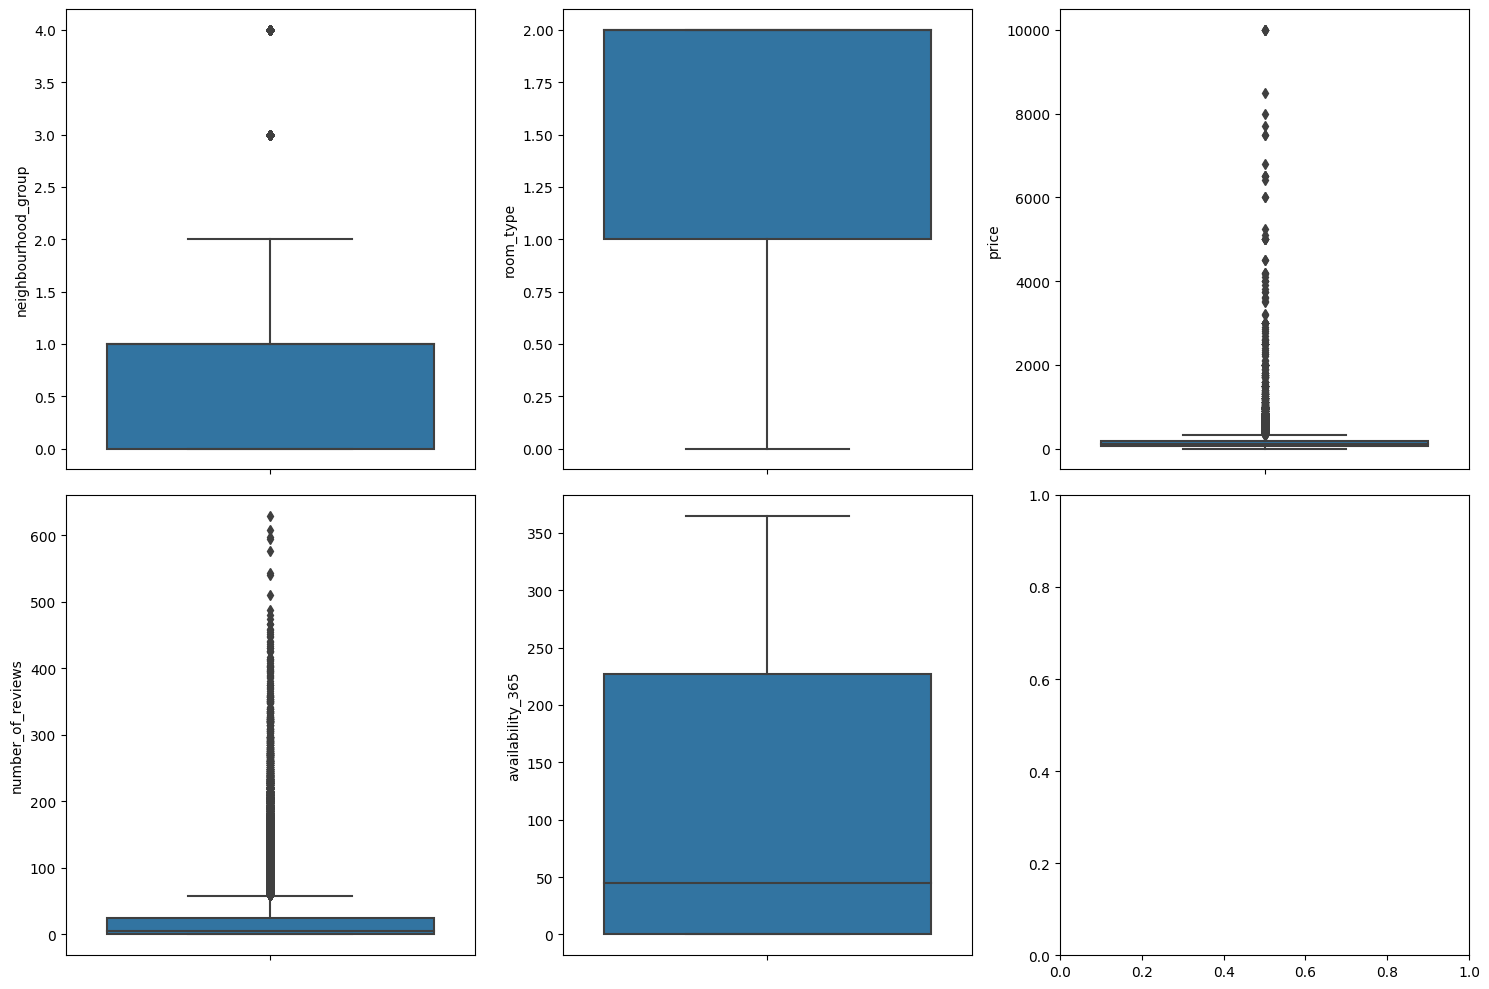

In [50]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = num_values, y = "neighbourhood_group")
sns.boxplot(ax = axis[0, 1], data = num_values, y = "room_type")
sns.boxplot(ax = axis[0, 2], data = num_values, y = "price")
sns.boxplot(ax = axis[1, 0], data = num_values, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = num_values, y = "availability_365")

plt.tight_layout()

plt.show()

In [61]:
num_values.groupby('neighbourhood_group').count()

,room_type,price,number_of_reviews,availability_365
neighbourhood_group,,,,
0,20104,20104,20104,20104
1,21661,21661,21661,21661
2,5666,5666,5666,5666
3,373,373,373,373
4,1091,1091,1091,1091


In [65]:
num_values.groupby('neighbourhood_group').mean()

,room_type,price,number_of_reviews,availability_365
neighbourhood_group,,,,
0,1.454934,124.383207,24.202845,100.232292
1,1.587184,196.875814,20.985596,111.979410
2,1.334981,99.517649,27.700318,144.451818
3,1.447721,114.812332,30.941019,199.678284
4,1.292392,87.496792,26.004583,165.758937


In [51]:
price_stats =  num_values["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [52]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [58]:
num_values[num_values["price"] > 1500]

,neighbourhood_group,room_type,price,number_of_reviews,availability_365
496,1,2,2000,30,0
946,1,1,3000,0,365
1480,1,2,2000,59,364
1862,0,2,4000,0,83
2018,1,2,2500,15,89
...,...,...,...,...,...
47869,1,2,1600,0,365
48043,1,2,6500,0,365
48304,1,2,2999,0,222
48305,1,2,1999,0,270


In [59]:
num_values.isnull().sum().sort_values(ascending=False)

neighbourhood_group    0
room_type              0
price                  0
number_of_reviews      0
availability_365       0
dtype: int64

Observations:
- There may be a correlation between the room type and the price of the airbnb
- The presence of airbnb concentrates in Manhattan and Brooklyn, followen by Queens
- The most expensive airbnb price mean is found in Manhattan
- The cheapest airbnb price mean is found is Bronx
- That could suggest also a correlation between the neighbourhood and price
- There are many outliers in the price and number of reviews. Since the outliers in price could suggest luxury option, we kept the values.
